# Car Counting -- Video and Image Analysis

In [1]:
!pip install opencv-python

In [2]:
import numpy as np
import csv
import cv2
import os
import timeit
import pandas as pd
from matplotlib import pyplot as plt

## Read image or video

In [3]:
def loadImage(img):
	if cv2.imread(img) is not None:
		image = cv2.imread(img)
		gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

		return image, gray
	else:
		return [], []

In [4]:
stuff, stuff_gray = loadImage('data/cv/orig.jpg')
#stuff

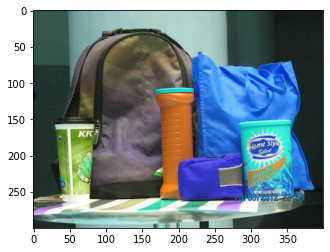

In [5]:
#plt.figure(figsize = (15,10))
plt.imshow(stuff)
plt.show()

Text(0.5, 1.0, 'B')

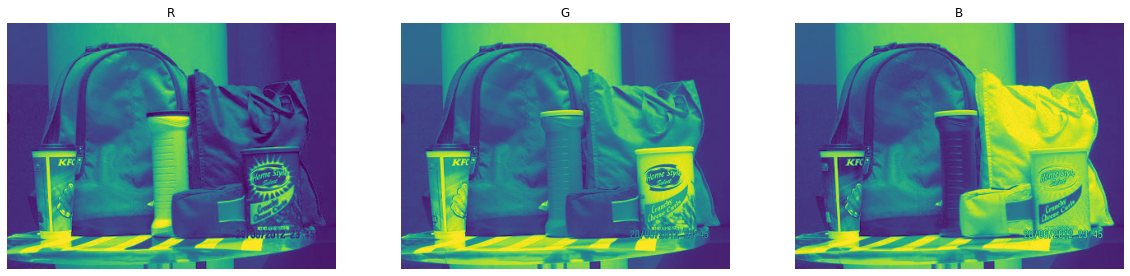

In [6]:
# Adds a subplot at the 1st position
rows = 1
columns = 3
# create figure
fig = plt.figure(figsize=(20, 15))
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(stuff[:,:,0])
plt.axis('off')
plt.title("R")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(stuff[:,:,1])
plt.axis('off')
plt.title("G")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(stuff[:,:,2])
plt.axis('off')
plt.title("B")

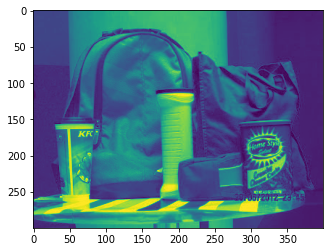

In [7]:
#plt.figure(figsize = (20,15))
plt.imshow(stuff[:,:,0])
plt.show()

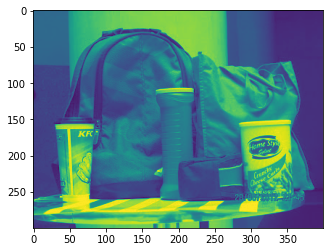

In [8]:
#plt.figure(figsize = (20,15))
plt.imshow(stuff[:,:,1])
plt.show()

In [9]:
stuff[0:10,:,0]

array([[52, 52, 52, ..., 22, 22, 22],
       [52, 52, 52, ..., 22, 22, 22],
       [52, 52, 52, ..., 22, 22, 22],
       ...,
       [52, 52, 52, ..., 22, 22, 22],
       [53, 53, 53, ..., 21, 21, 21],
       [53, 53, 53, ..., 21, 21, 21]], dtype=uint8)

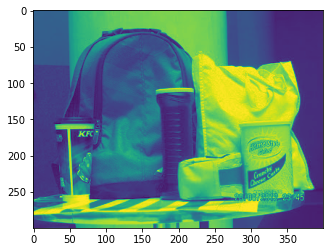

In [10]:
#plt.figure(figsize = (20,15))
plt.imshow(stuff[:,:,2])
plt.show()

In [11]:
street, street_gray = loadImage('data/cv/street_screenshot.png')

In [12]:
street.shape

(919, 1642, 3)

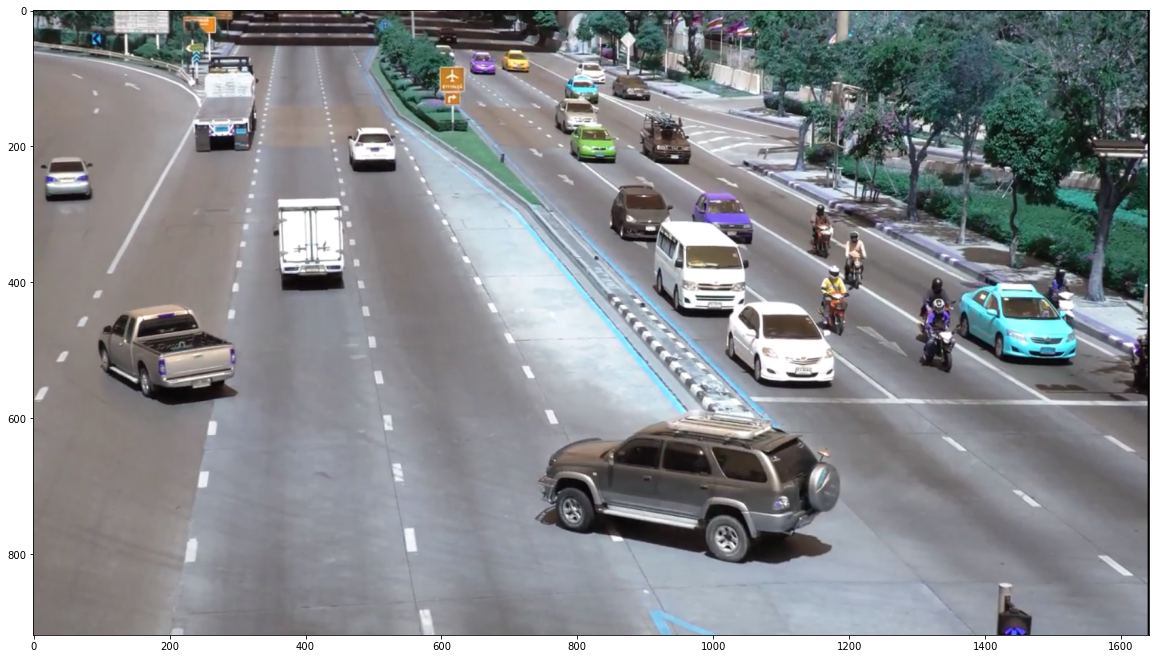

In [13]:
plt.figure(figsize = (20,15))
plt.imshow(street)
plt.show()

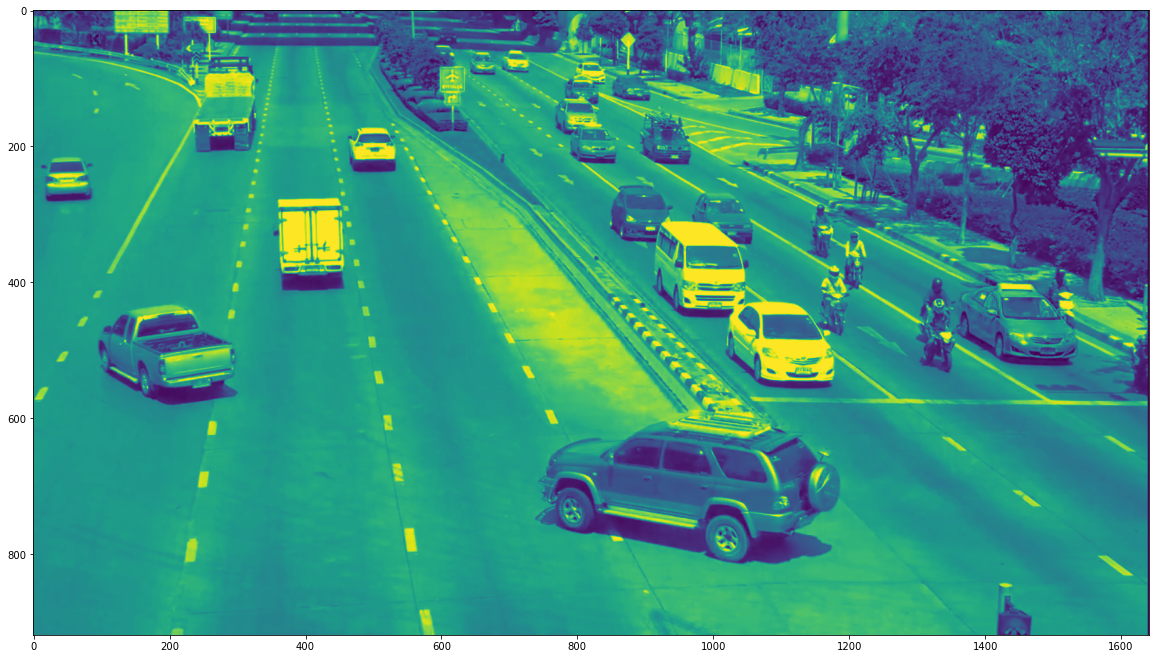

In [14]:
plt.figure(figsize = (20,15))
plt.imshow(street[:,:,0])
plt.show()

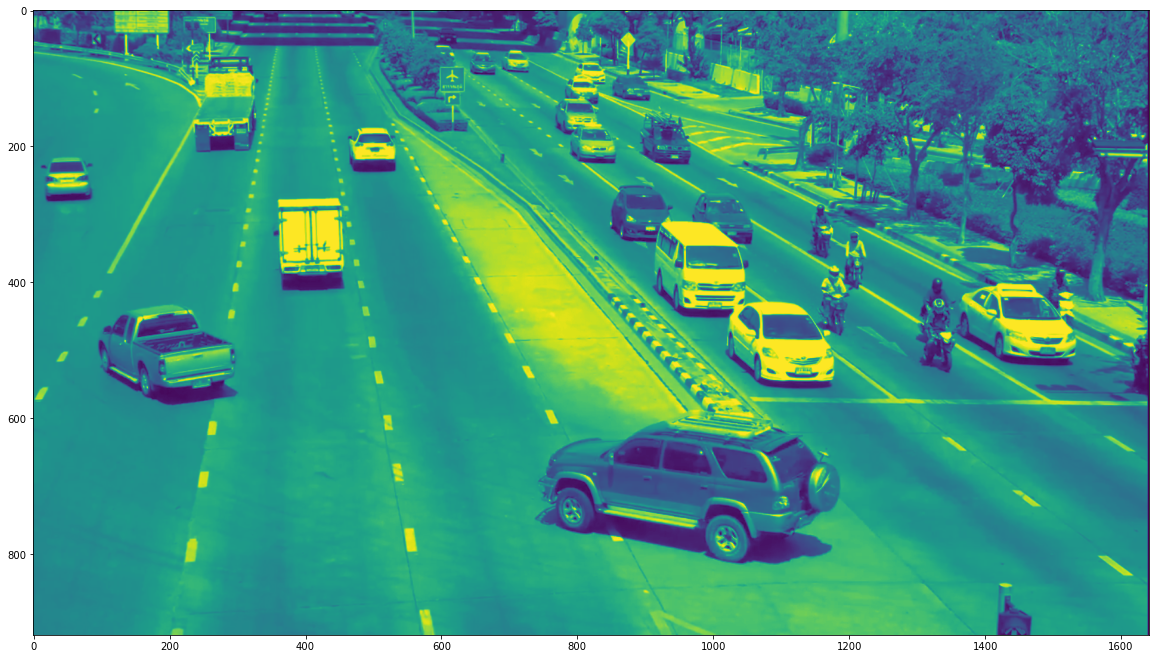

In [15]:
plt.figure(figsize = (20,15))
plt.imshow(street[:,:,1])
plt.show()

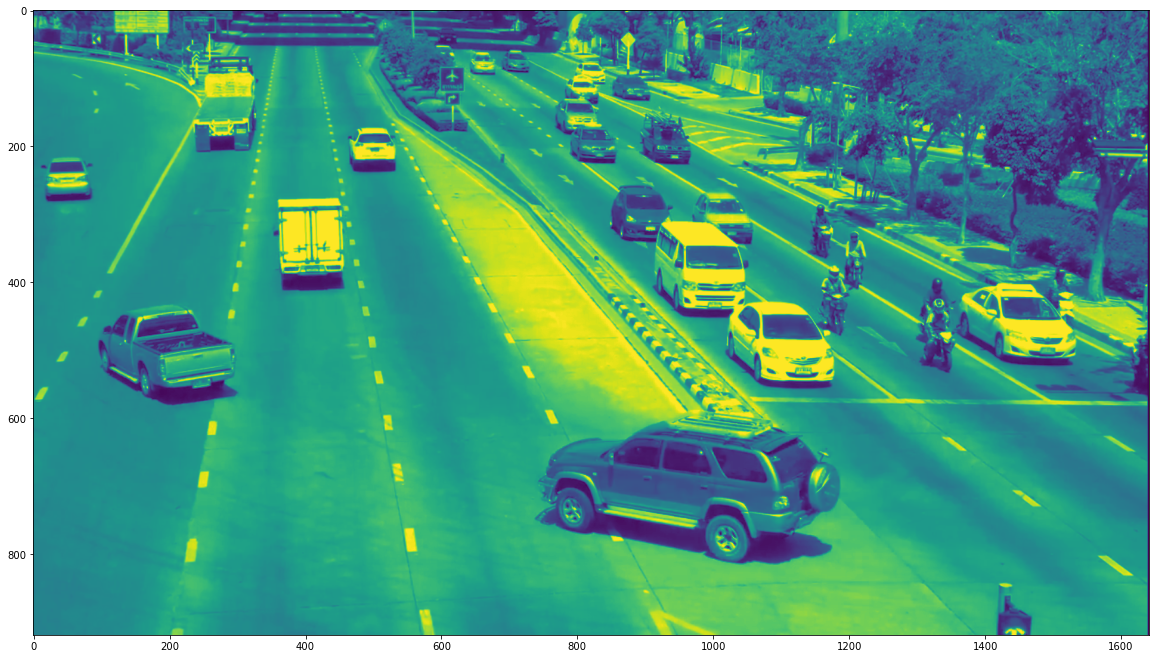

In [16]:
plt.figure(figsize = (20,15))
plt.imshow(street[:,:,2])
plt.show()

In [17]:
gray_image = cv2.cvtColor(street, cv2.COLOR_BGR2GRAY)
gray_image

array([[ 64,  65,  64, ..., 113,   0,   0],
       [ 73,  70,  66, ..., 100,   0,   0],
       [ 79,  74,  68, ...,  78,   0,   0],
       ...,
       [114, 114, 114, ..., 144,   0,   0],
       [114, 114, 114, ..., 144,   0,   0],
       [114, 114, 114, ..., 144,   0,   0]], dtype=uint8)

In [18]:
# Set up the detector with default parameters.
#detector = cv2.SimpleBlobDetector_create()
 
# Detect blobs.
#keypoints = detector.detect(street[:,:,0])

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 120;
params.maxThreshold = 255;
# Range: 0-255
 
# Filter by Area.
params.filterByArea = True
params.minArea = 500
params.maxArea = 6000
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0
 
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.1
 
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
    detector = cv2.SimpleBlobDetector(params)
else : 
    detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(gray_image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(gray_image, keypoints, np.array([]), (0,0,255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
ret,thresh1 = cv2.threshold(im_with_keypoints,200,255,cv2.THRESH_BINARY)

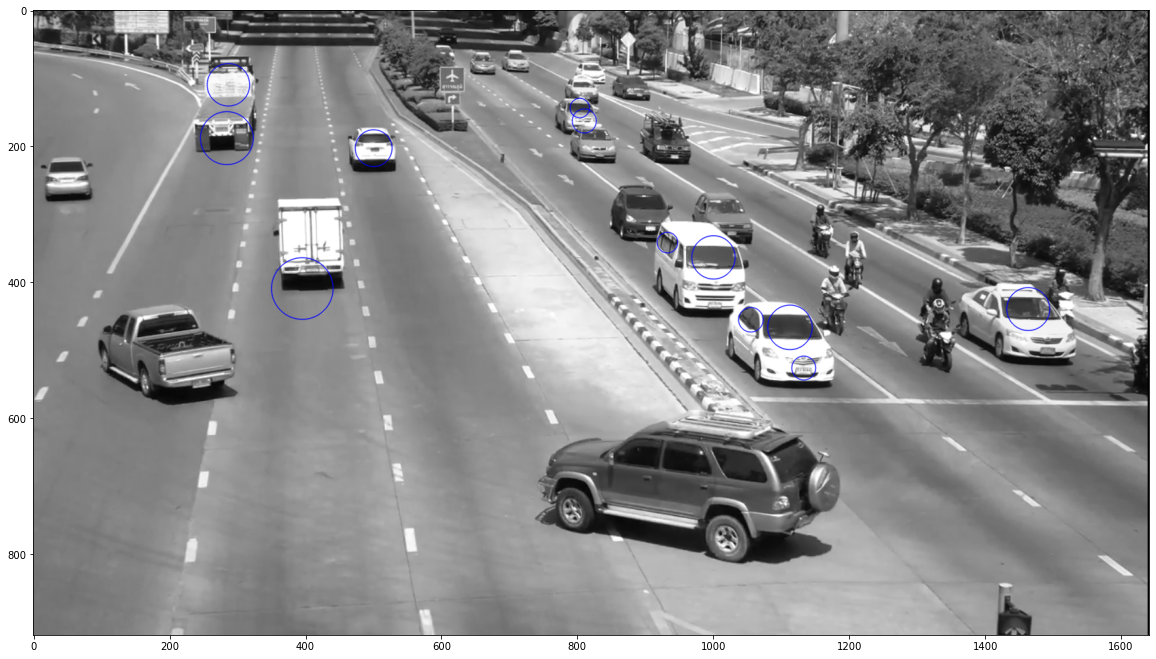

In [19]:
# Show keypoints
plt.figure(figsize = (20,15))
plt.imshow(im_with_keypoints)
plt.show()

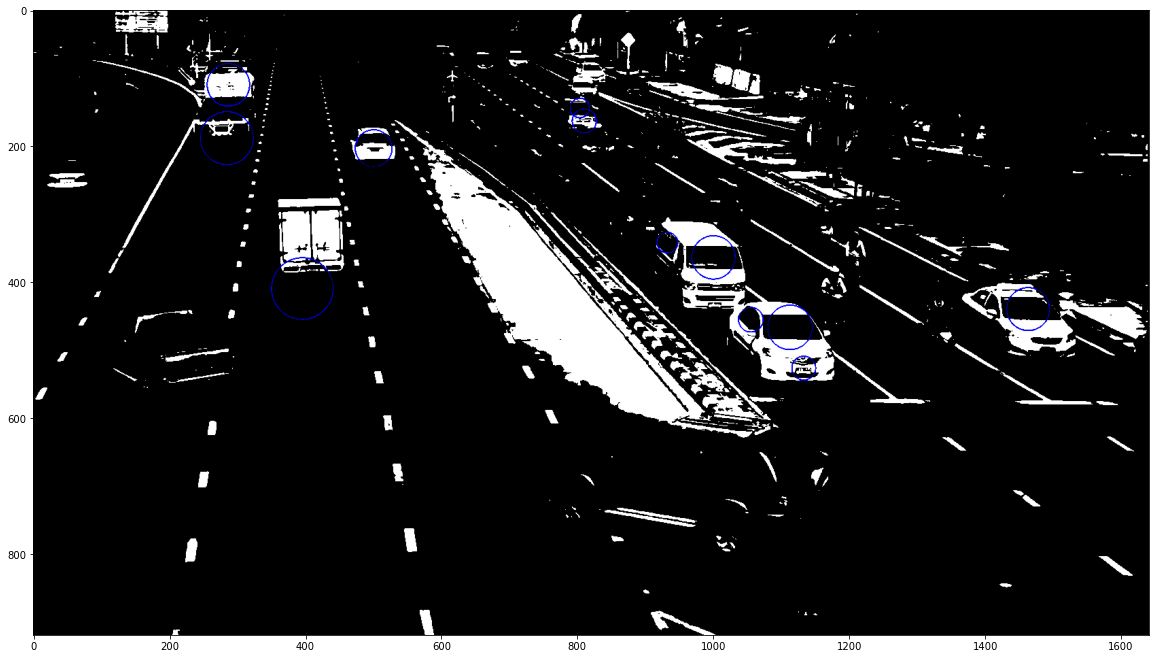

In [20]:
plt.figure(figsize = (20,15))
plt.imshow(thresh1)

In [21]:
number_of_blobs = len(keypoints)
number_of_blobs

12

In [22]:
keypoints

(<KeyPoint 0000023EB3A46A80>,
 <KeyPoint 0000023EB3AC4EA0>,
 <KeyPoint 0000023EB3A55AB0>,
 <KeyPoint 0000023EB3A55600>,
 <KeyPoint 0000023EB3A68EA0>,
 <KeyPoint 0000023EB5AC7F90>,
 <KeyPoint 0000023EB5B06900>,
 <KeyPoint 0000023EB5B06990>,
 <KeyPoint 0000023EB5B06420>,
 <KeyPoint 0000023EB5B069C0>,
 <KeyPoint 0000023EB5B06A20>,
 <KeyPoint 0000023EB5B06A80>)

In [23]:
import cv2
import numpy as np
 
# Create a VideoCapture object
cap = cv2.VideoCapture('./cv/4K_Traffic Monitoring_Road.mp4')
 
# Check if camera opened successfully
if (cap.isOpened() == False): 
  print("Unable to read camera feed")
 
# Default resolutions of the frame are obtained.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
 
# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
number_of_cars = []
frame_count = 0
while(True):
    ret, frame = cap.read()

    if ret == True: 
        gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        keypoints = detector.detect(gray_image)
        im_with_keypoints = cv2.drawKeypoints(frame, keypoints, np.array([]), (0,0,255),
                                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        # Write the frame into the file 'output.avi'
        out.write(im_with_keypoints)
        number_of_cars.append(len(keypoints))

        # Display the resulting frame    
        cv2.imshow('frame',im_with_keypoints)

        # Press Q on keyboard to stop recording
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
        

    # Break the loop
    else:
        break    

In [26]:
# When everything done, release the video capture and video write objects
cap.release()
out.release()

Text(0, 0.5, 'Number of cars')

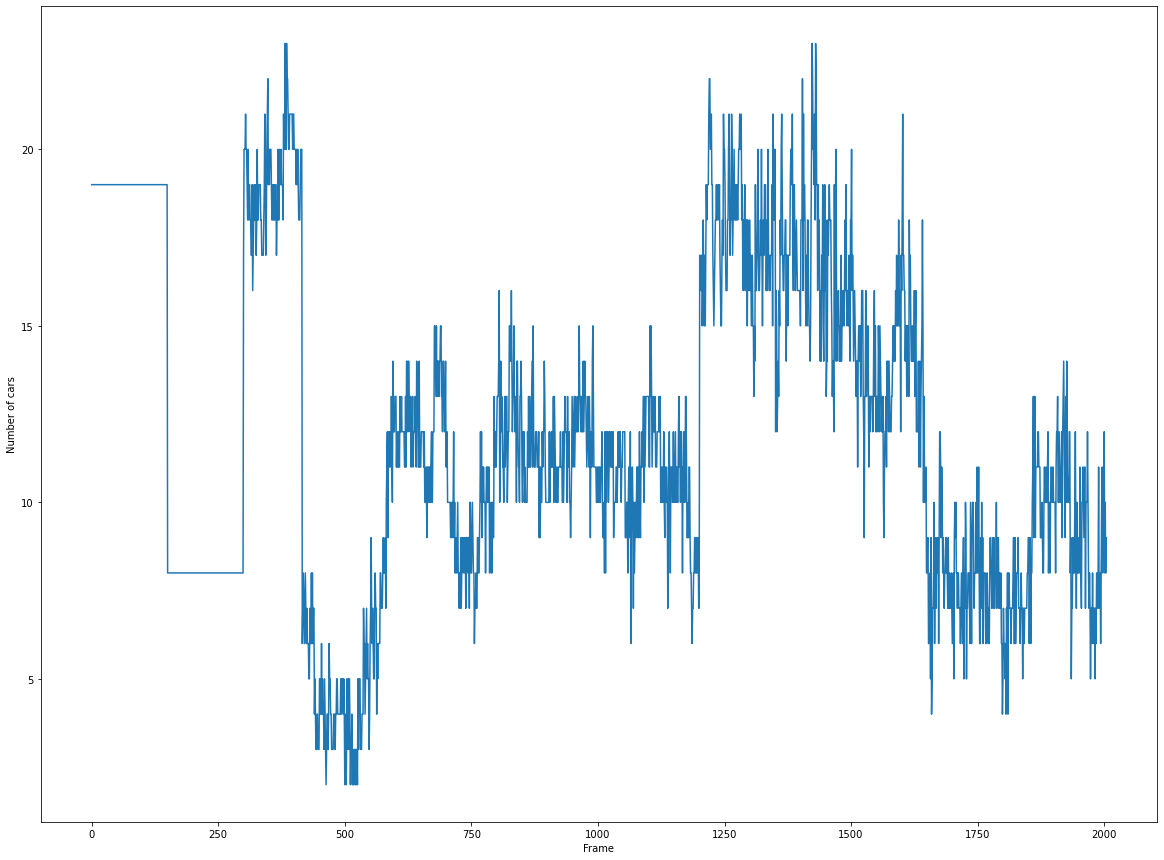

In [27]:
plt.figure(figsize = (20,15))
plt.plot(number_of_cars)
plt.xlabel('Frame')
plt.ylabel('Number of cars')